In [9]:
# Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots I will create

# Read in the data

df = pd.read_csv(r'C:\Users\Scott\OneDrive\Documents\Data Analysis Course Materials\Projects\Alex the Analyst\Python Movies Correlation\movies.csv')

In [18]:
# Let's look at the data

df.head()
df.describe()

,year,score,votes,budget,gross,runtime
count,5421.000000,5421.000000,5.421000e+03,5.421000e+03,5.421000e+03,5421.000000
mean,2001.661317,6.392455,1.150661e+05,3.600917e+07,1.032297e+08,108.152739
std,10.540908,0.962730,1.844073e+05,4.157337e+07,1.873027e+08,18.115698
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.073640e+07,95.000000
50%,2002.000000,6.500000,5.200000e+04,2.180000e+07,3.686941e+07,105.000000
75%,2011.000000,7.100000,1.290000e+05,4.500000e+07,1.124625e+08,118.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


In [12]:
# Looking for any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))
    
df = df.dropna()

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [13]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [20]:
# Changing data type of columns

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [27]:
# Create correct year column

df['yearcorrect'] = df['released'].str.extract(pat='([0-9]{4})').astype(int)

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


In [69]:
sorted_gross = df.sort_values(by = ['gross'], inplace = False, ascending = False)
sorted_gross.head(20)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012
6646,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7.1,370000,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137.0,2015
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.8,148000,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103.0,2019


In [63]:
pd.set_option('display.max_rows', 20)

In [64]:
# Dropping duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
4007                               i5 Films
6793                             i am OTHER
6420                                   erbp
                       ...                 
385                        1818 Productions
2929                          1492 Pictures
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 1475, dtype: object

In [34]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


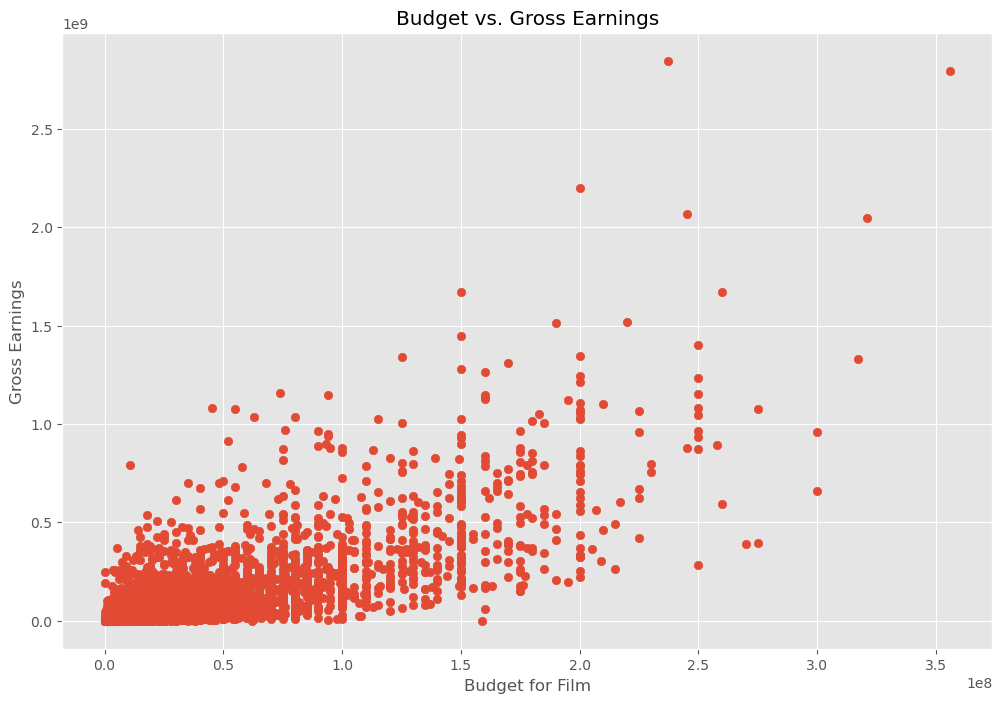

In [36]:
# Scatter plot with Budget vs Gross Revenue

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs. Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

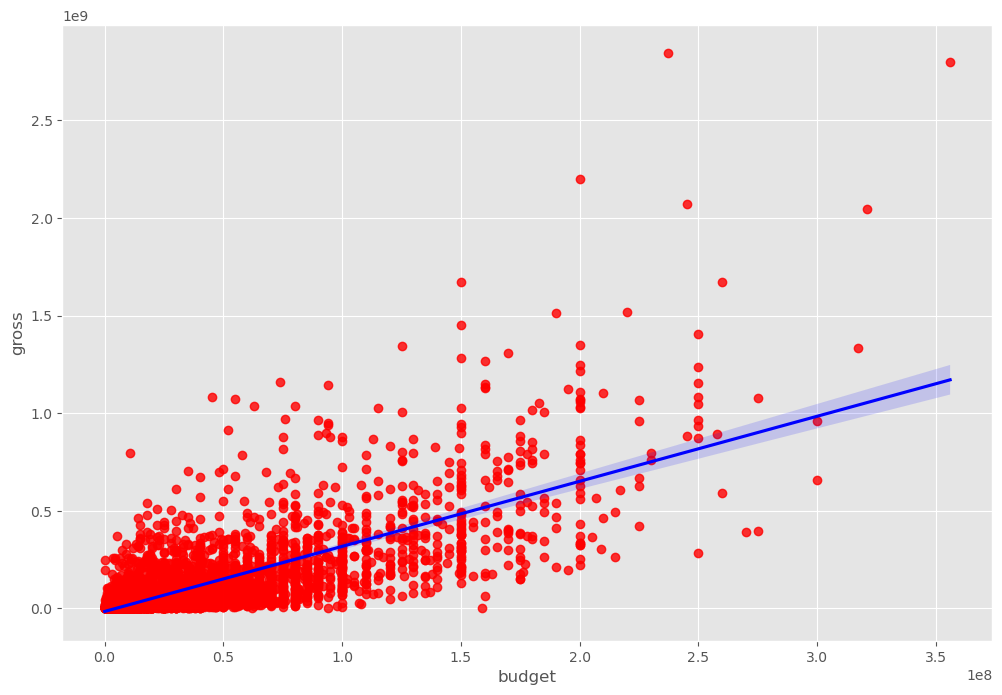

In [39]:
# Plot Budget vs Gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [40]:
# Looking at correlation


In [65]:
df.corr(method = 'pearson')

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


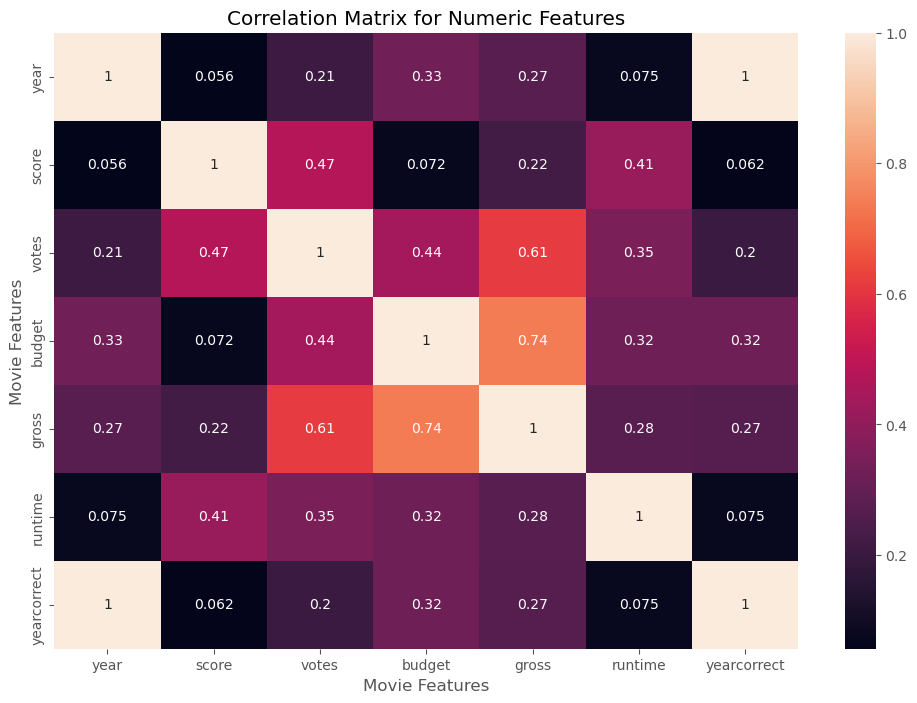

year         score          0.056386
score        year           0.056386
yearcorrect  score          0.061923
score        yearcorrect    0.061923
             budget         0.072001
                              ...   
gross        gross          1.000000
votes        votes          1.000000
score        score          1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 49, dtype: float64

In [66]:
correlation_matrix = df.corr(method='pearson')
corr_pairs = correlation_matrix.unstack()
sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

sorted_pairs = corr_pairs.sort_values()
sorted_pairs

In [67]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]

high_corr

votes        gross          0.614751
gross        votes          0.614751
             budget         0.740247
budget       gross          0.740247
yearcorrect  year           0.998726
year         yearcorrect    0.998726
             year           1.000000
budget       budget         1.000000
gross        gross          1.000000
votes        votes          1.000000
score        score          1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# Votes and Budget have highest correlation to gross earnings